In [2]:
import os
import random
import uuid

import numpy as np
import py
import scipy.signal
import configparser

from asammdf import MDF, Signal

# Fake Channels and associated unit.
channels = {
    "engine_speed": "rpm",
    "engine_speed_desired": "rpm",
    "vehicle_speed": "kph",
    "transmission_gear": "uint8",
    "coolant_temp": "C",
    "longitude": "",
    "latitude": "",
    "power": "W",
    "efficiency": "[unitless]",
    "X": "",
    "Y": "",
    "VehicleDetected": "",
    "HumanDetected": "",
    "AutopilotEngaged": "",
}

# Fake companies & their certifications.
companies = {
    "HeavyEquipmentInc": ["IEC 61508"],
    "CarCompanyLLC": ["ISO-26262"],
    "HeavyDutyTruckCorp": ["IEC 61508", "ISO-26262"],
    "SlowlyDyingGuerilla": ["DO-187C"],
    "DasAutoGMBH": ["ISO-26262"],
    "Sil.icon.Vall.eyStartup": ["ISO-26262", "IEC 61508", "DO-187C"],
    "Tier1": ["ISO-26262", "IEC 61508", "DO-187C"],
    "Tier2": ["ISO-26262", "IEC 61508", "DO-187C"],
    "Tier3": ["ISO-26262", "IEC 61508", "DO-187C"],
}

# Fake Products
products = [
    "Bulldozer",
    "DumpTruck",
    "Skidsteer",
    "SUV",
    "Wagon",
    "Transmission",
    "Airplane",
    "SpaceShip",
    "ADAS",
    "SkunkWorks",
]

# Versions of MDF to save data as.
versions = ["2.00", "2.10", "2.14", "3.00", "3.10", "3.20", "3.30", "4.00", "4.10", "4.11"]

# Sample Time Data Generation
## Total signal time
tf = 3600
# Multiple time vectors
t1 = np.arange(0, tf, 1, dtype=np.float32)
t2 = np.arange(0, tf, 2, dtype=np.float32)
t5En1 = np.arange(0, tf, 5e-1, dtype=np.float32)
t1En3 = np.arange(0, tf, 1e-3, dtype=np.float32)
# List of all possible time vectors.
timestamps = [t5En1, t1En3]


def sine(t, A=1, f=1):
    """SINE

    """
    sine_ = A * np.sin(2 * np.pi * f * t)
    return sine_


def cos(t, A=1, f=1):
    """COSINE

    """
    cos_ = A * np.sin(2 * np.pi * f * t)
    return cos_


def square(t, A=1, f=1):
    """SQUARE

    """
    square_ = A * scipy.signal.square(2 * np.pi * f * t)
    return square_


def sawtooth(t, A=1, f=1):
    """SAWTOOTH

    """
    sawtooth_ = A * scipy.signal.sawtooth(2 * np.pi * f * t, width=1)
    return sawtooth_


def triangle(t, A=1, f=1):
    """TRIANGLE
    """
    triangle_ = A * scipy.signal.sawtooth(2 * np.pi * f * t, width=0.5)
    return triangle_


# List with each of the signal generator types.
signal_generators = [sine, cos, square, sawtooth, triangle]


def random_data():
    signals = list()
    for channel_name, channel_units in channels.items():
        if isinstance(channel_units, str):
            channel_unit = channel_units
        else:
            raise type(channel_units)

        signal_generator = random.choice(signal_generators)

        A = random.randint(1, 100)
        f = random.randint(1, 100)
        T = random.choice(timestamps)
        Y = signal_generator(T, A, f)

        signal_ = Signal(samples=Y, timestamps=T, name=channel_name, unit=channel_unit)
        signals.append(signal_)

    company = random.choice(list(companies.keys()))
    certification = random.choice(companies[company])
    product = random.choice(products)
    version = random.choice(versions)

    data_file_uuid = str(uuid.uuid4())

    channel_path_ = ["Data", company, product, certification, data_file_uuid]

    channel_path = py.path.local(os.path.join(*channel_path_))
    channel_path.dirpath().ensure(dir=True)

    mdf = MDF(version=version)
    mdf.append(signals=signals, common_timebase=False)
    o = mdf.save(dst=str(channel_path), overwrite=True, compression=2)
    return o


In [3]:
signals = list()
for channel_name, channel_units in channels.items():
    if isinstance(channel_units, str):
        channel_unit = channel_units
    else:
        raise type(channel_units)

    signal_generator = random.choice(signal_generators)

    A = 1
    f = 1
    T = random.choice(timestamps)
    Y = signal_generator(T, A, f)

    signal_ = Signal(samples=Y, timestamps=T, name=channel_name, unit=channel_unit)
    signals.append(signal_)
version = versions[-1]

In [4]:
mdf = MDF(version=version)
mdf.append(signals=signals, common_timebase=False)

In [6]:
for signal_generator in signal_generators:
    break

In [7]:
signal_generator.__name__

'sine'

[array([0.0000e+00, 5.0000e-01, 1.0000e+00, ..., 3.5985e+03, 3.5990e+03,
        3.5995e+03], dtype=float32),
 array([0.0000000e+00, 1.0000000e-03, 2.0000001e-03, ..., 3.5999971e+03,
        3.5999983e+03, 3.5999993e+03], dtype=float32)]

In [40]:
tf=10
timestamps = {
    "t1En1": np.arange(0, tf, 1e-1, dtype=np.float32),
    "t1En2": np.arange(0, tf, 1e-2, dtype=np.float32),
    "t1En3": np.arange(0, tf, 1e-3, dtype=np.float32),
    "t1En4": np.arange(0, tf, 1e-4, dtype=np.float32),
    "t1En5": np.arange(0, tf, 1e-5, dtype=np.float32),
}

In [41]:
for signal_generator in signal_generators:
    break
for t_name, T in timestamps.items():
    break

In [42]:
channel_name = "{}_{}".format(signal_generator.__name__, t_name)
channel_name

'sine_t1En1'

In [43]:
A = 1
f = 1
Y = signal_generator(T, A, f)

signal_ = Signal(samples=Y, timestamps=T, name=channel_name)

In [ ]:
signal_

In [ ]:
A = 1
f = 1
T = random.choice(timestamps)
Y = signal_generator(T, A, f)

signal_ = Signal(samples=Y, timestamps=T, name=channel_name)

In [25]:
signals=list()
signals.append(signal_)

In [27]:
mdf = MDF(
    version=versions[-1],
)
mdf.append(
    signals=signals,
    common_timebase=False,
)
o = mdf.save(
    dst=str("baseline"),
    overwrite=True,
    compression=2,
)

In [31]:
mdf.get_group(0)

,sine_t1En1
time,
0.000000,0.000000e+00
0.100000,5.877852e-01
0.200000,9.510565e-01
0.300000,9.510565e-01
0.400000,5.877852e-01
0.500000,-8.742278e-08
0.600000,-5.877855e-01
0.700000,-9.510565e-01
0.800000,-9.510565e-01


In [36]:
len(mdf.groups)

1

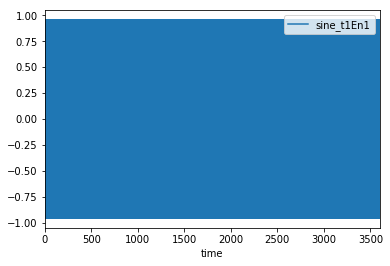

In [39]:
mdf.get_group(0).plot()

In [38]:
%matplotlib inline